In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv("engine_data.csv")  # Replace with your dataset's path

# Separate features and target
X = data[['Engine rpm', 'Lub oil pressure', 'Coolant pressure', 
          'lub oil temp', 'Coolant temp', 'Fuel pressure']]
y = data['Engine Condition']

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Complete!")


Data Preprocessing Complete!


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),  # 6 features
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

'''
# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50,  # Adjust epochs as needed
                    batch_size=16,  # Mini-batch size
                    verbose=1)

print("Model training complete!")
'''

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Start with 50; training may stop early
    batch_size=32,  # Optimal for balancing speed and memory
    callbacks=[early_stopping],
    verbose=1
)

print("Training complete!")


Epoch 1/50


c:\Users\there\anaconda3\envs\combined_el\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6399 - loss: 0.6524 - val_accuracy: 0.6537 - val_loss: 0.6185
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6643 - loss: 0.6111 - val_accuracy: 0.6524 - val_loss: 0.6134
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6614 - loss: 0.6086 - val_accuracy: 0.6534 - val_loss: 0.6114
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6605 - loss: 0.6104 - val_accuracy: 0.6537 - val_loss: 0.6095
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6713 - loss: 0.5986 - val_accuracy: 0.6537 - val_loss: 0.6110
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6697 - loss: 0.5986 - val_accuracy: 0.6588 - val_loss: 0.6071
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6675 - loss: 0.6054 - val_accuracy: 0.6547 - val_loss: 0.6093
Epoch 8/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6744 - loss: 0.5954 - val_accuracy: 0.6580 - val_

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6575 - loss: 0.6136
Test Accuracy: 66.01%


In [7]:
model.save("fleet_maintenance_model.h5")
print("Model saved as fleet_maintenance_model.h5")


Model saved as fleet_maintenance_model.h5


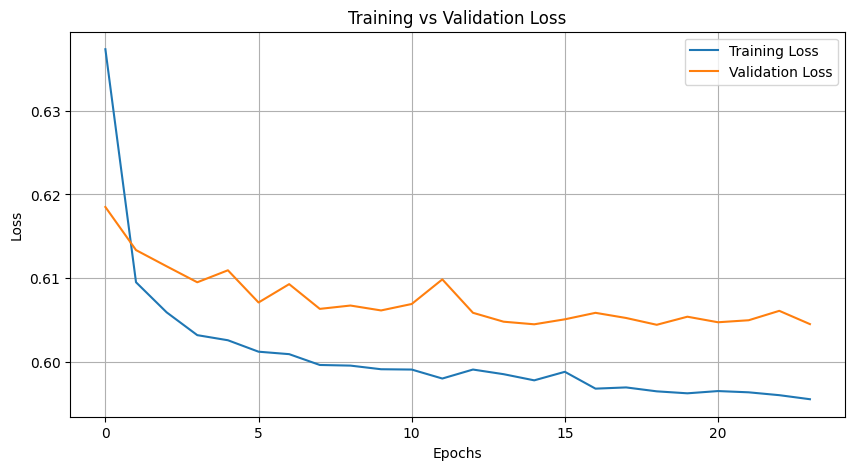

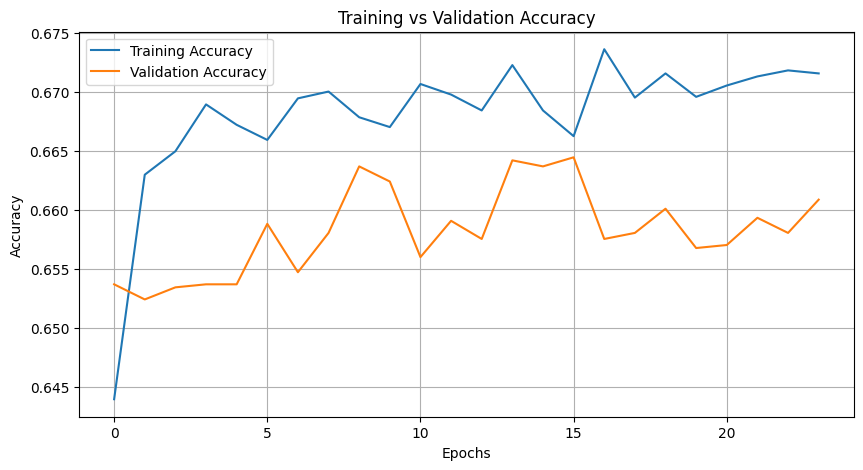

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()
